In [78]:
import numpy as np
import matplotlib.pyplot as plt
#from pylab import *
import os
import sys
#from keras_contrib.applications import densenet
from keras.models import Model
from keras.regularizers import l2
from keras.layers import *
from keras.engine import Layer
from keras.applications.vgg16 import *
from keras.models import *
from keras.applications.imagenet_utils import _obtain_input_shape
import keras.backend as K
import theano as T

from utils.get_weights_path import *
from utils.basics import *
from utils.resnet_helpers import *
from utils.BilinearUpSampling import *

In [79]:
from scipy import ndimage
imList = [];d='/media/parallellab2/PRR/FCN_rtMRI_data/F1/videos/354'
for imageName in sorted(os.listdir('/media/parallellab2/PRR/FCN_rtMRI_data/F1/videos/354')):
    imList.append(ndimage.imread(d + os.sep + imageName))
imTensor = np.concatenate(imList).astype("uint8")


(68, 68, 3)


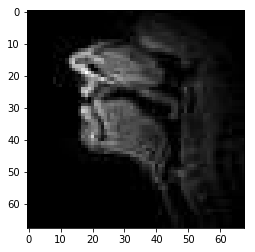

In [80]:
print(imList[0].shape)
imgplot = plt.imshow(imList[1])
plt.show()


In [81]:
def AtrousFCN_Vgg16_16s(input_shape=(68,68,3), weight_decay=0., batch_momentum=0.9, batch_shape=None, classes=21):
    if batch_shape:
        img_input = Input(batch_shape=batch_shape)
        image_size = batch_shape[1:3]
    else:
        img_input = Input(shape=input_shape)
        image_size = input_shape[0:2]
    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1', kernel_regularizer=l2(weight_decay))(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2', kernel_regularizer=l2(weight_decay))(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1', kernel_regularizer=l2(weight_decay))(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2', kernel_regularizer=l2(weight_decay))(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1', kernel_regularizer=l2(weight_decay))(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2', kernel_regularizer=l2(weight_decay))(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3', kernel_regularizer=l2(weight_decay))(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1', kernel_regularizer=l2(weight_decay))(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2', kernel_regularizer=l2(weight_decay))(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3', kernel_regularizer=l2(weight_decay))(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1', kernel_regularizer=l2(weight_decay))(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2', kernel_regularizer=l2(weight_decay))(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3', kernel_regularizer=l2(weight_decay))(x)

    # Convolutional layers transfered from fully-connected layers
    x = Conv2D(4096, (7, 7), activation='relu', padding='same', dilation_rate=(2, 2),
                      name='fc1', kernel_regularizer=l2(weight_decay))(x)
    x = Dropout(0.5)(x)
    x = Conv2D(4096, (1, 1), activation='relu', padding='same', name='fc2', kernel_regularizer=l2(weight_decay))(x)
    x = Dropout(0.5)(x)
    #classifying layer
    x = Conv2D(classes, (1, 1), kernel_initializer='he_normal', activation='linear', padding='valid', strides=(1, 1), kernel_regularizer=l2(weight_decay))(x)

    x = BilinearUpSampling2D(target_size=tuple(image_size))(x)

    model = Model(img_input, x)

    #weights_path = os.path.expanduser(os.path.join('~', '.keras/models/fcn_vgg16_weights_tf_dim_ordering_tf_kernels.h5'))
    #model.load_weights(weights_path, by_name=True)
    return model


In [82]:
model1=AtrousFCN_Vgg16_16s(input_shape=(68,68,3),classes=2)

TypeError: Expected binary or unicode string, got Elemwise{add,no_inplace}.0